In [2]:
%load_ext autoreload
%autoreload 2

import copy

## initialize `G_baseline` network

In [3]:
N = 1000
INIT_EXPOSED = int(N*0.5)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G_baseline   = demographic_graphs['baseline']
G_quarantine = demographic_graphs['distancingScale0.7']

households_indices = [household['indices'] for household in households]

Generated overall age distribution:
0-9: 0.1230	(0.0020 from target)
10-19: 0.1030	(-0.0280 from target)
20-29: 0.1370	(0.0000 from target)
30-39: 0.1420	(0.0090 from target)
40-49: 0.1360	(0.0120 from target)
50-59: 0.1320	(0.0010 from target)
60-69: 0.1150	(0.0000 from target)
70-79: 0.0710	(0.0010 from target)
80+: 0.0410	(0.0030 from target)

Generated household size distribution:
1: 0.3213	(0.0375 from target)
2: 0.3188	(-0.0263 from target)
3: 0.1329	(-0.0178 from target)
4: 0.1377	(0.0100 from target)
5: 0.0459	(-0.0119 from target)
6: 0.0266	(0.0039 from target)
7: 0.0169	(0.0044 from target)
Num households: 414
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 20-59...
Generating graph for 60+...


In [4]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel

from seirsplus.sim_loops_pooled_test import SimulationRunner


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## correlated pooling

In [20]:

# don't know why but have to create it every time
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_correlated = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='correlated',
    T = 100,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = True,
    output_path = '../results/US_N=10000_p=0.01_T=100/correlated/')

sim_correlated.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 46.74it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 38.61it

In [19]:
sim_correlated.model.transmissionTerms_IQ

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

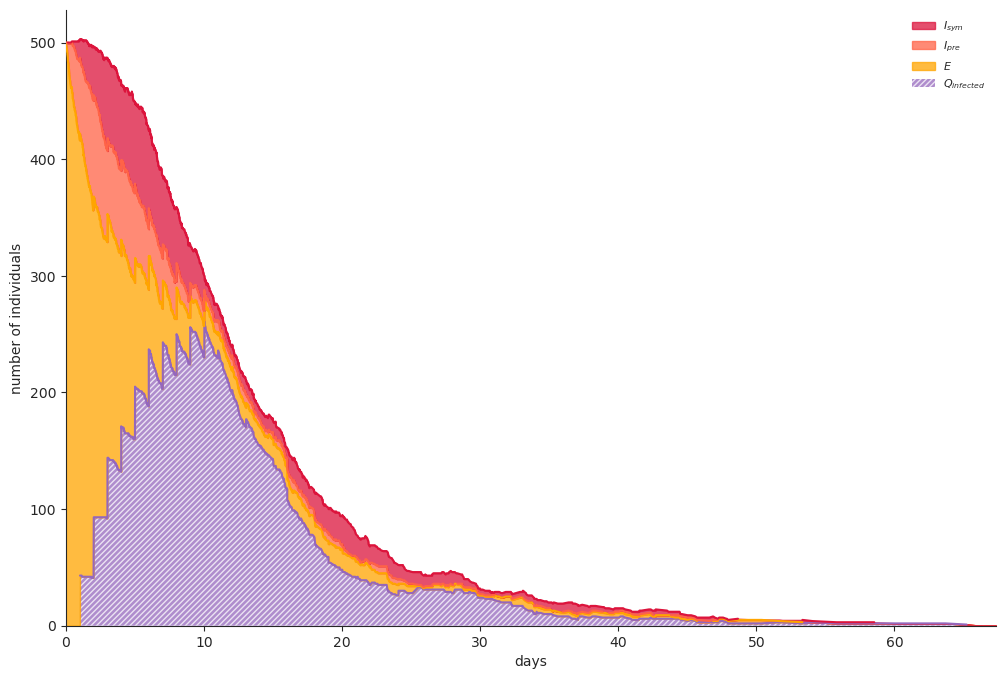

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [16]:
sim_correlated.model.figure_infections(plot_percentages=False)

In [54]:
# cum_num_positives, cum_num_identified, sensitivity, test consumption
sim_correlated.get_cumulative_test_performance() 

{'cum_num_positives': 19,
 'cum_num_identified': 15,
 'cum_sensitivity': 0.7894736842105263,
 'cum_num_tests': 1850}

## Naive pooling

In [21]:
# don't know why but have to create it every time
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='naive',
    T = 100,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = True,
    output_path = '../results/US_N=10000_p=0.01_T=100/naive/')

sim_naive.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1]:
# cum_num_positives, cum_num_identified, sensitivity, test consumption
sim_naive.get_cumulative_test_performance() 

NameError: name 'sim_naive' is not defined

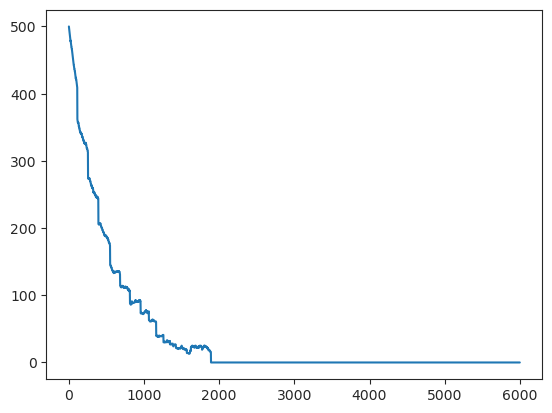

In [10]:
import matplotlib.pyplot as plt

plt.plot(sim_naive.model.numE)

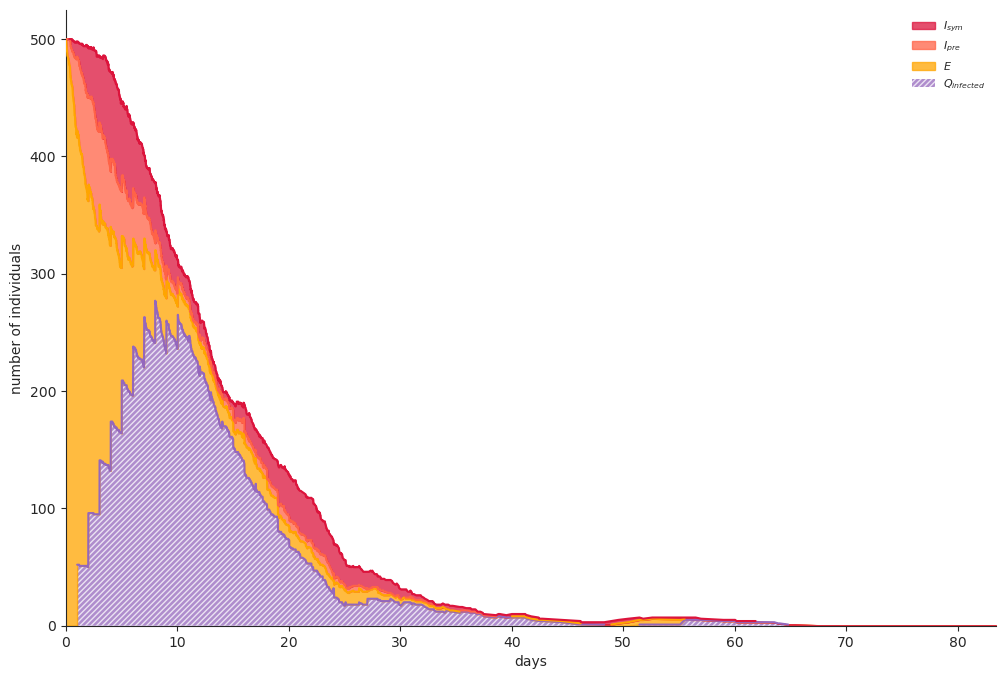

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [14]:
sim_naive.model.figure_infections(plot_percentages=False)

## Starting point for investigating whether we can use `copy.deepcopy()` and just instantiate the model once (not finished!)

In [85]:
# we can see that even if we used `model=copy.copy(test_model)` in the Sim Runner above,
# the model itself is still modified, see e.g, the numE time series (init [10,0,...,0])
print(test_model.__dict__['numE'])

[10.  9.  8. ...  0.  0.  0.]


In [86]:
# now let's instantiate another test_model and try copy.deepcopy

test_model_2 = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


In [87]:
test_model_2.__dict__['numE']

array([10.,  0.,  0., ...,  0.,  0.,  0.])

In [4]:
sim_naive_2 = SimulationRunner(
    model=copy.deepcopy(test_model_2),
    pooling_strategy='naive',
    T = 100,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False,
    output_path = '../results/US_N=10000_p=0.01_T=100/')

sim_naive_2.run_simulation()


KeyboardInterrupt



In [90]:
# the numE time series of test_model_2 is not modified
test_model_2.__dict__['numE']

array([10.,  0.,  0., ...,  0.,  0.,  0.])

In [89]:
sim_naive_2.model.__dict__['numE']

array([10.,  9.,  8., ...,  0.,  0.,  0.])

### TODO: there are definitely more rigorous ways to verify this